In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## パラメータ調整方法
ハイパーパラメータ調整の方法として次の3つがある.このノートではグリッドサーチの実装について示す.
- ランダムサーチ
- グリッドサーチ
- ベイズ最適化

## 交差検証 + グリッドサーチ

In [2]:
df = pd.read_csv("data3.csv")
df.head()

,x,y
0,4.337520,7.763191
1,0.201284,7.851685
2,-0.504076,7.773407
3,0.812612,9.694481
4,4.670285,7.922672


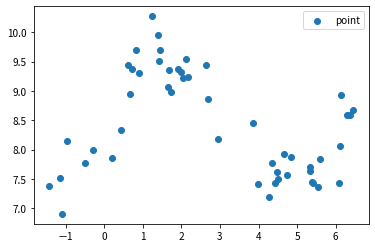

In [3]:
plt.figure(facecolor='white')
plt.scatter(df["x"],df["y"],label='point')
plt.legend()

In [5]:
# データセットの分割
from sklearn.model_selection import train_test_split

X = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1) # 訓練データとテストデータに分割

print(X_train.shape) # 訓練データ
print(X_test.shape) # テストデータ

(37, 1)
(13, 1)


In [27]:
# 交差検証とグリッドサーチ

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

degree=4
poly_features = PolynomialFeatures(degree=degree,include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

model = Ridge()
params_grid = {
    "alpha" : np.linspace(0,100,1001) # [0,99]の範囲を探索
}

# cv : 交差検証の分割数
# scoring : 性能指標
# n_jobs : コア数
search = GridSearchCV(model,params_grid,cv=5,n_jobs=-1)
search.fit(X_train_poly,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ])})

In [28]:
search.best_params_ # 最適なパラメータ

{'alpha': 1.1}

決定係数(test) :  0.848367161624785
MSE(test) :  0.11959842203433714


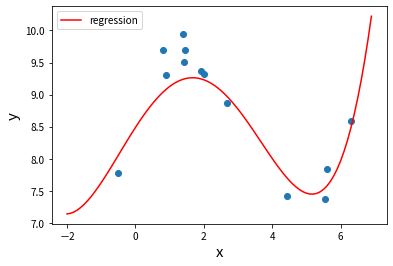

In [34]:
from sklearn.metrics import mean_squared_error

Xpred = np.arange(-2,7,0.1).reshape(-1,1) # プロット用の行列を生成
Xpred_poly = poly_features.fit_transform(Xpred) # フォーマット変換
ypred = search.predict(Xpred_poly) # 予測

print("決定係数(test) : ",search.score(X_test_poly,y_test)) # 決定係数を計算する説明変数X,目的変数y
print("MSE(test) : ", mean_squared_error(y_test,search.predict(X_test_poly)))

plt.figure(facecolor="white")
plt.scatter(X_test,y_test)
plt.plot(Xpred,ypred,c="r",label="regression")
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend()
plt.show()